##Sobre o projeto

Descrição do Projeto: Análise da Qualidade do Ar nas Regiões do Brasil
Este projeto foi desenvolvido com o objetivo de analisar a qualidade do ar em diferentes regiões do Brasil, incluindo São Paulo, Rio de Janeiro, Minas Gerais e Espírito Santo. O foco principal foi identificar se existem diferenças significativas na qualidade do ar entre essas regiões, utilizando técnicas de análise exploratória de dados e testes estatísticos.

Passos Realizados:
Carregamento e Limpeza dos Dados:

O primeiro passo foi carregar os dados relativos à qualidade do ar nas quatro regiões brasileiras selecionadas. Foi feita uma análise preliminar para verificar a integridade dos dados, identificar e tratar eventuais valores ausentes ou inconsistências.
Análise Exploratória de Dados (EDA):

Realizei uma análise exploratória dos dados para entender melhor a distribuição das variáveis e identificar padrões ou anomalias. Foram gerados gráficos e estatísticas descritivas para visualizar a qualidade do ar em cada uma das regiões.
Teste de Hipóteses - ANOVA:

Para verificar se a qualidade do ar diferia significativamente entre as regiões, utilizei o teste ANOVA (Análise de Variância de uma via). Esse teste foi escolhido por ser apropriado para comparar as médias de mais de dois grupos. O teste foi realizado com a hipótese nula de que as regiões têm a mesma qualidade do ar e a hipótese alternativa de que pelo menos uma das regiões apresenta uma média de qualidade do ar diferente das outras.
Interpretação dos Resultados:

A análise resultou em uma estatística F baixa e um valor-p alto, indicando que não há evidências suficientes para rejeitar a hipótese nula. Portanto, concluiu-se que as quatro regiões analisadas têm qualidade do ar semelhante, com base nos dados disponíveis.
Documentação e Apresentação:

Todo o processo foi documentado cuidadosamente no Jupyter Notebook, incluindo comentários explicativos e uma discussão dos resultados obtidos. A visualização dos dados e os resultados dos testes foram apresentados de forma clara e objetiva.
Reflexão e Aprendizado:
Este projeto foi meu primeiro projeto solo em análise de dados, e foi uma experiência enriquecedora que me permitiu aplicar e consolidar conhecimentos adquiridos. Através deste trabalho, desenvolvi uma compreensão mais profunda sobre a importância da análise exploratória e dos testes estatísticos na interpretação de dados. Além disso, aprendi a documentar o processo de maneira eficaz, o que é essencial para a clareza e replicabilidade dos resultados.

Estou animado para continuar aprimorando minhas habilidades e explorar projetos ainda mais complexos no futuro.

In [17]:
#Carregando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Informações sobre a base

A base é dividia entre 5 variáveis, sendo 3 delas catégoricas, com respecitivamente o nome da cidade, região (ou estado) e país dos dados e duas variáveis numéricas, onde "AirQuality" fala da qualidade do ar e quanto maior o valor melhor e "WaterPollution" que fala sobre a poluição da água, onde quanto menor melhor.

##Análise primária

Antes de começar a manipular os dados em si, eu conferi a contagem de valores nulos e como estavam dividias as variáveis numéricas.

Assim obtendo as informações de 425 valores nulos dentro de "region" e os valores da média e da mediana para saber se havia uma variação muito grande entre as duas


##tramentos

Em relação aos valores nulos, eu decidi apenas os manter na base, pois como eu não criarei nenhum tipo de modelo para treinar neste momento e fiz análises em cima da base num geral, os valores nulos não iriam me atrapalhar.

Quanto a média e a mediana, elas não estão com uma diferença muito grande, fazendo assim com que evidencie que possivelmente não existe outliers dentro da base, no qual será verificado mais para frente com os gráficos

In [3]:
#Carregando o data frame
df = pd.read_csv('/content/sample_data/Cities1.csv')
#Analisando a estrutura da base
df.head()

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3963 non-null   object 
 1   Region          3538 non-null   object 
 2   Country         3963 non-null   object 
 3   AirQuality      3963 non-null   float64
 4   WaterPollution  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


In [11]:
df.describe()

,AirQuality,WaterPollution
count,3963.000000,3963.000000
mean,62.253452,44.635372
std,30.944753,25.663910
min,0.000000,0.000000
25%,37.686567,25.000000
50%,69.444444,50.000000
75%,87.500000,57.719393
max,100.000000,100.000000


# Gráficos

Com base na descrição realizada, decidi analisar como os dados estavam distribuidos por toda a base, o primeiro gráfico criado foi o histograma

### **Histograma**

foram cridos dois histogramas, uma representando a qualidade do ar e outra os níveis de poluição das águas

Histograma 1 - com base no gráfico, pode-se notar que os dados em sua maioria, encontram-se concentrados acima da média e mediana, sendo encontrados mais próximos do 100, ou seja, numa qualidade do ar muito boa

Histograma 2 - Já neste gráfico que nos mostra a divisão dos dados sobre a poluição das águas, podemos ver que a grande maioria dos dados concentram-se na mediana. diferente do gráfico anterior, quanto mais próximo de 100, pior.


### **Dispersão**
Utilização:
 Eu utilizei este gráfico para ver como uma variável se relaciona com a outra, e o analisando, podemos ver que quanto mais vamos aumentando a qualidade do ar, o nível de poluição na água diminui, e isto pode se dar a diversos fatores políticos ou apenas fatores ambientais.

Relação entre os dados:
  A variabilidade sugere que, embora haja uma correlação geral, existem exceções significativas. Algumas regiões podem ter alta qualidade do ar e alta poluição da água, ou vice-versa, o que indica que outros fatores podem estar influenciando essas variáveis.

Pontos Isolados:
Existem pontos isolados em áreas com baixa qualidade do ar (próximos a 0) e baixa poluição da água (próximos a 0), e outros com alta qualidade do ar (próximos a 100) e alta poluição da água (próximos a 100). Esses podem ser considerados outliers ou casos especiais.

### **Boxplot**

Utilização:
  Eu utilizei o boxplot, majoritariamente para analisar se existia algum outlier aparente, mas pelo visto os dados seguem de fato um padão dentro de um intervalo


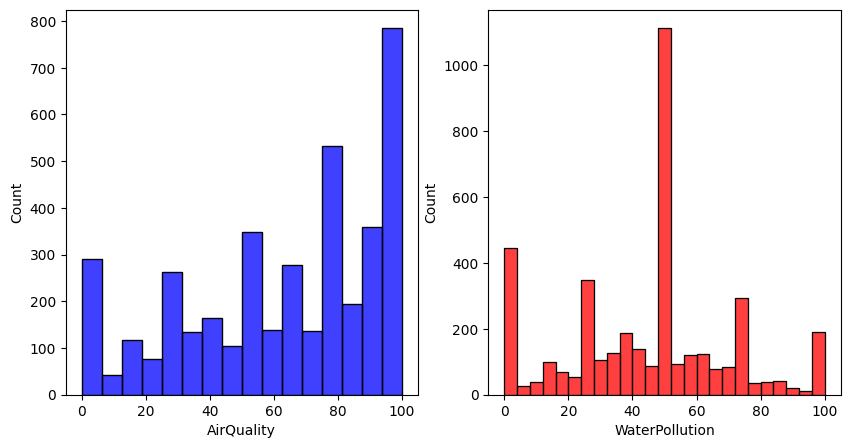

In [13]:
#Plot realizado para entendimento de como estava distribuído os dados dentro da base
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 linha, 2 colunas
sns.histplot(df['AirQuality'] ,color='blue', ax=axes[0])
sns.histplot(x = df['WaterPollution'], color='red', ax=axes[1])
plt.show()

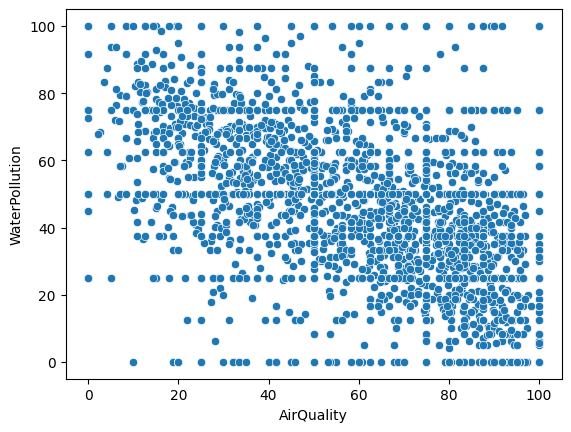

In [14]:
#Gráfico criado para demonstrar a concentração e distribução dos dados entre as variávies

sns.scatterplot(x='AirQuality', y='WaterPollution', data=df)
plt.show()


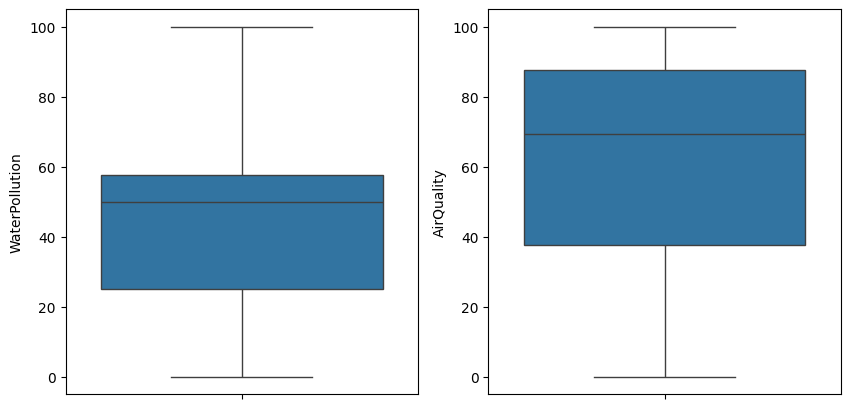

In [ ]:
#Boxplot usando para análise de possíveis outliers aparentes

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 linha, 2 coluna
sns.boxplot(y=df['WaterPollution'], ax=axes[0])
sns.boxplot(y=df['AirQuality'], ax=axes[1])
plt.show()

# Teste de Correlação de Spearman

  Como no gráfico de dispersão eu pude notar o padrão entra as duas variáveis, eu pensei em testar sua correlação para saber se necessariamente quando um valor subisse o outro desceria, porém, pelo resultado de -0.44, podemos negar essa hipótese

In [ ]:
qualidade_ar = df['AirQuality']
poluicao_agua = df['WaterPollution']
spearman_corr, _ = spearmanr(qualidade_ar, poluicao_agua)
print(f"Correlação de Spearman: {spearman_corr }")

Correlação de Spearman: -0.44576006330811335


#Verificação dados do Brasil

Como se trata de uma análise para estudo, fiquei curioso para saber como o brasil está em relação ao mundo no quesito de poluição e qualidade do ar

#Gráficos

Como podemos analisar pelos gráficos, temos em sua maioria a qualidade do ar predominantemente boa e a poluição da água em torno da média, assim como nos primeiros gráficos

In [28]:
df_brasil = df.loc[df['Country'] == 'Brazil']

df_brasil.describe()

,AirQuality,WaterPollution
count,103.000000,103.000000
mean,63.291876,52.747595
std,24.842414,25.906378
min,0.000000,0.000000
25%,49.583333,37.500000
50%,62.500000,50.000000
75%,83.166667,75.000000
max,100.000000,100.000000


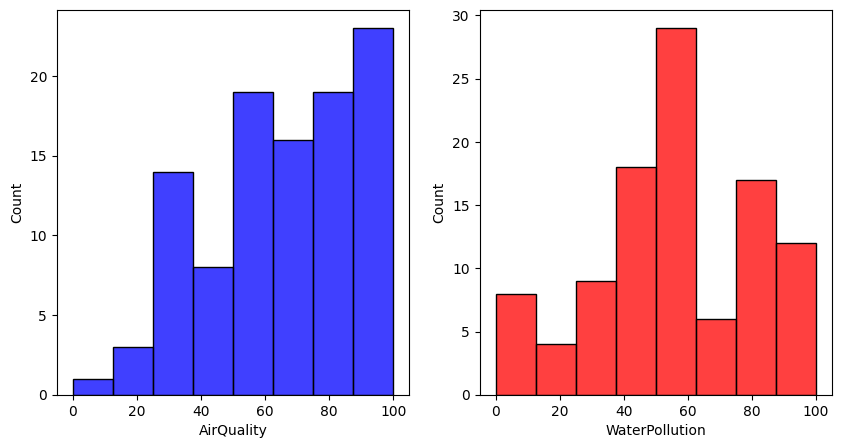

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 linha, 2 colunas
sns.histplot(df_brasil['AirQuality'] ,color='blue', ax=axes[0])
sns.histplot(x = df_brasil['WaterPollution'], color='red', ax=axes[1])
plt.show()

#Análise Região sudeste do Brasil

como este projeto trata-se para um melhor entendimento dos conteúdos, eu decidi criar um tópico um pouco mais fechado, podendo analisar uma quantidade de dados mais específica, então escolhi a região onde eu moro.


## Testes
###Qualidade do ar
Eu utilizei o teste de ANOVA na qualidade do ar para poder ver se havia uma diferença significativa entre os estados, porém seu valor deu muito acima do valor definido, que foi 0,05, ou seja, assim não tendo evidências para rejeitar a hipótese nula de que não há uma diferença significativa entre a qualidade de ar das regiões

###Nível de poluição da água

Enquanto no teste anteriores de ANOVA nós não obtemos evidências o sulficiente para rejeitar a hipótese nula, neste teste obtemos, podendo colocar assim que existe evidências de uma diferença significativa entre a poluição da água nos estados. Após isso eu realizei o teste de tukey, onde analisando par por par, podemos ver que na verdade não temos evidências para rejeitar a hipótese nula.


##Gráficos

Nos gráficos criados, não temos uma comparação semelhante, pois na base existia muito mais valores de SP do que de outra regiões, mas ainda sim eu os criei para podermos ver de modo visual a distribuição dos valores

In [27]:
#Definindo as variáveis que vou utilizar

df_sp = df_brasil.loc[df_brasil['Region'] == 'Sao Paulo']
df_rj = df_brasil.loc[df_brasil['Region'] == 'Rio de Janeiro']
df_minas = df_brasil.loc[df_brasil['Region'] == 'Minas Gerais']
df_es = df_brasil.loc[df_brasil['Region'] == 'Espirito Santo']
#Aplicando teste ANOVA para poder ver se há uma diferença siginificativa entre os valores
anova_result = stats.f_oneway(df_sp['AirQuality'], df_rj['AirQuality'], df_minas['AirQuality'], df_es['AirQuality'])

print(f"Estatística F: {anova_result.statistic}")
print(f"Valor-p: {anova_result.pvalue}")

Estatística F: 0.2926581805765186
Valor-p: 0.8305113248693317


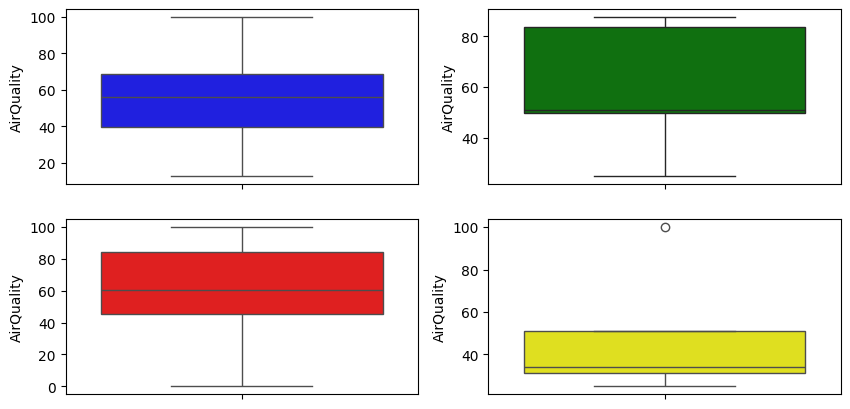

In [24]:
#Plotando os gráficos para podermos analisar os valores visualmente
fig, axes = plt.subplots(2, 2, figsize=(10, 5))  # 1 linha, 2 coluna
sns.boxplot(df_sp['AirQuality'] ,color='blue', ax=axes[0,0])#Sâo paulo
sns.boxplot(df_rj['AirQuality'], color='red', ax=axes[1,0])#Rio de janeiro
sns.boxplot(df_minas['AirQuality'], color='green', ax=axes[0,1])#Minas Gerais
sns.boxplot(df_es['AirQuality'], color='yellow', ax=axes[1,1])#Espirito Santo
plt.show()

In [19]:
#Aplicando teste ANOVA para poder ver se há uma diferença siginificativa entre os valores
anova_result = stats.f_oneway(df_sp['WaterPollution'], df_rj['WaterPollution'], df_minas['WaterPollution'], df_es['WaterPollution'])

print(f"Estatística F: {anova_result.statistic}")
print(f"Valor-p: {anova_result.pvalue}")

Estatística F: 2.8572707543927636
Valor-p: 0.045625042949427735


In [20]:
df_combined = pd.DataFrame({
    'WaterPollution': pd.concat([df_sp['WaterPollution'], df_rj['WaterPollution'], df_minas['WaterPollution'], df_es['WaterPollution']]),
    'Region': ['Sao Paulo'] * len(df_sp) + ['Rio de Janeiro'] * len(df_rj) + ['Minas Gerais'] * len(df_minas) + ['Espirito Santo'] * len(df_es)
})

# Realizar o teste de Tukey
tukey_result = pairwise_tukeyhsd(endog=df_combined['WaterPollution'], groups=df_combined['Region'], alpha=0.05)

# Mostrar os resultados do teste de Tukey
print(tukey_result)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------
Espirito Santo   Minas Gerais -20.6608 0.5571 -62.3061 20.9845  False
Espirito Santo Rio de Janeiro  -5.0942  0.984 -42.7638 32.5753  False
Espirito Santo      Sao Paulo -25.2914 0.2388 -60.5281  9.9452  False
  Minas Gerais Rio de Janeiro  15.5666 0.5405 -15.1905 46.3237  False
  Minas Gerais      Sao Paulo  -4.6306 0.9707 -32.3547 23.0934  False
Rio de Janeiro      Sao Paulo -20.1972 0.0689 -41.4878  1.0934  False
---------------------------------------------------------------------


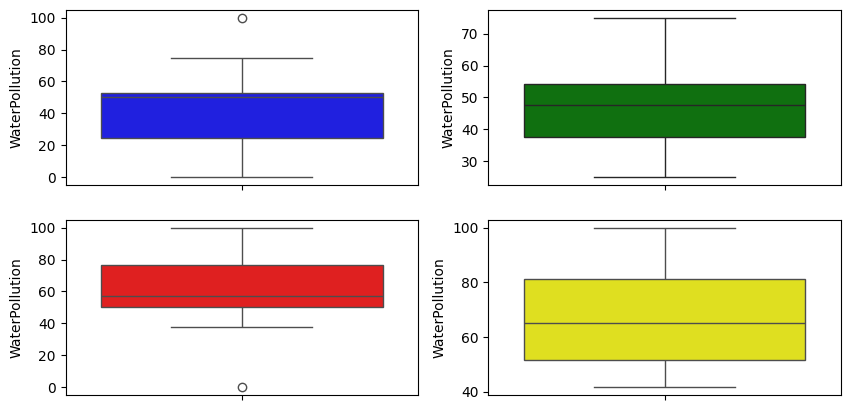

In [25]:
#protando os valores para poder comparar os resultados visualmente
fig, axes = plt.subplots(2, 2, figsize=(10, 5))  # 1 linha, 2 coluna
sns.boxplot(df_sp['WaterPollution'] ,color='blue', ax=axes[0,0])#São paulo
sns.boxplot(df_rj['WaterPollution'], color='red', ax=axes[1,0])#Rio de janeiro
sns.boxplot(df_minas['WaterPollution'], color='green', ax=axes[0,1])#MInas Gerais
sns.boxplot(df_es['WaterPollution'], color='yellow', ax=axes[1,1])#Espirito Santo
plt.show()